In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import time # for measuring execution time
import seaborn as sns # for statistical data visualization
%matplotlib inline


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
#Loading the data

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/4050/taiwanese_bankruptcy_prediction.csv")

In [ ]:
# view dimensions of dataset

df.shape

(6819, 96)

In [ ]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [ ]:
# view column names again

df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [ ]:
# rename column names

#df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
 #             'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [ ]:
# view the renamed column names

#df.columns

In [ ]:
# check distribution of target_class column

df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [ ]:
# view the percentage distribution of target_class column

df['Bankrupt?'].value_counts()/float(len(df))

Bankrupt?
0    0.967737
1    0.032263
Name: count, dtype: float64

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [ ]:
# check for missing values in variables

df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,...,6819.00,6.819000e+03,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.0,6819.00
mean,0.03,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,...,0.81,1.862942e+07,0.62,0.61,0.84,0.28,0.03,0.57,1.0,0.05
std,0.18,0.06,0.07,0.06,0.02,0.02,0.01,0.01,0.01,0.01,...,0.04,3.764501e+08,0.01,0.02,0.01,0.01,0.02,0.01,0.0,0.05
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00
25%,0.00,0.48,0.54,0.53,0.60,0.60,1.00,0.80,0.81,0.30,...,0.80,0.000000e+00,0.62,0.60,0.84,0.28,0.03,0.57,1.0,0.02
50%,0.00,0.50,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,...,0.81,0.000000e+00,0.62,0.61,0.84,0.28,0.03,0.57,1.0,0.03
75%,0.00,0.54,0.59,0.58,0.61,0.61,1.00,0.80,0.81,0.30,...,0.83,1.000000e-02,0.62,0.61,0.84,0.28,0.03,0.57,1.0,0.05
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,9.820000e+09,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00


In [ ]:
# draw boxplots to visualize outliers

# Number of columns in the DataFrame
num_columns = len(df.columns)

# Number of rows and columns for subplots, assuming you want 2 columns per row
num_rows = (num_columns + 1) // 2  # ceiling division

# Create a figure with a grid of subplots
plt.figure(figsize=(24, num_rows * 5))  # adjust height based on the number of rows

# Loop over the columns and create a subplot for each boxplot
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1)
    fig = df.boxplot(column=column)
    fig.set_title(column)
    fig.set_ylabel(column)

plt.tight_layout()  # adjust layout to prevent overlap
plt.show()

In [ ]:
# plotting histogram to check distribution , this will give us an idea on the skewness of each feature


# Create a figure with a grid of subplots
plt.figure(figsize=(24, num_rows * 5))  # adjust height based on the number of rows

# Loop over the columns and create a subplot for each histogram
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1)
    fig = df[column].hist(bins=20)
    fig.set_xlabel(column)
    fig.set_ylabel('Frequency')
    fig.set_title(column)

plt.tight_layout()  # adjust layout to prevent overlap
plt.show()

In [ ]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the Pearson correlation matrix
plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
#Declare feature vector and target variable
X = df.drop(['Bankrupt?'], axis=1)

y = df['Bankrupt?']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((5455, 95), (1364, 95))

In [ ]:
#Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[cols])

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[cols])

In [ ]:
X_train_scaled.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,...,5.455000e+03,5455.000000,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5455.0,5.455000e+03
mean,9.638893e-16,-1.458860e-16,-3.529919e-16,1.685504e-15,9.853814e-16,7.527455e-15,6.742015e-15,-8.032845e-15,-1.636007e-15,1.471885e-16,...,7.124966e-16,0.000000,3.068490e-15,2.194802e-15,8.151378e-15,1.052463e-15,1.563064e-17,-1.982486e-15,0.0,-1.237425e-16
std,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,...,1.000092e+00,1.000092,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,0.0,1.000092e+00
min,-8.065445e+00,-8.656815e+00,-8.617812e+00,-3.400558e+01,-3.402697e+01,-6.867168e+01,-5.544260e+01,-5.327392e+01,-2.437642e+01,-5.515853e+01,...,-2.046218e+01,-0.052316,-4.681236e+01,-3.400552e+01,-5.863025e+01,-7.219406e+00,-1.523700e+00,-4.855591e+01,0.0,-9.445645e-01
25%,-4.843902e-01,-3.560391e-01,-4.367774e-01,-4.158285e-01,-4.149955e-01,1.892862e-02,1.803552e-02,1.903477e-02,-1.404804e-02,1.713594e-02,...,-2.776820e-01,-0.052316,-2.110068e-02,-4.157114e-01,-2.136542e-02,-2.547576e-01,-4.503271e-02,-1.844023e-02,0.0,-4.598337e-01
50%,-3.512435e-02,2.313264e-02,-1.596241e-02,-1.059715e-01,-1.063475e-01,2.253575e-02,2.336611e-02,2.321862e-02,-9.274736e-03,2.192163e-02,...,7.276329e-02,-0.052316,-3.200639e-03,-1.060183e-01,5.355599e-02,-1.176335e-01,-4.398507e-02,-1.040661e-02,0.0,-2.744973e-01
75%,5.123418e-01,4.741653e-01,5.065052e-01,3.355295e-01,3.301978e-01,2.756109e-02,3.140530e-02,2.934865e-02,-4.423816e-03,2.887229e-02,...,4.717794e-01,-0.052316,1.849697e-02,3.356210e-01,1.356253e-01,8.511341e-02,-3.762261e-02,3.003574e-02,0.0,1.006669e-01
max,8.313529e+00,6.614888e+00,6.709088e+00,2.194125e+01,2.195654e+01,8.984751e-02,1.411051e+01,1.257587e+01,5.590397e+01,1.543775e+01,...,4.874985e+00,23.820943,2.821695e+01,2.194137e+01,1.113383e+01,5.320648e+01,5.904909e+01,1.473853e+01,0.0,1.906536e+01


In [ ]:
#Run SVM with default hyperparameters

In [ ]:
# import SVC classifier
# Start the timer
start_time = time.time()

from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train_scaled,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# End the timer
end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with default hyperparameters: 0.9670
Execution time: 0.7494 seconds


In [ ]:
#Run SVM with rbf kernel and C=100.0
#We have seen that there are outliers in our dataset.
#So, we should increase the value of C as higher C means fewer outliers.
#So, I will run SVM with kernel=rbf and C=100.0.

In [ ]:
# instantiate classifier with rbf kernel and C=100
start_time = time.time()

svc=SVC(C=100.0)
#A higher C value means the model will try to classify all training examples correctly by assigning higher penalties to misclassifications.

# fit classifier to training set
svc.fit(X_train_scaled,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with rbf kernel and C=100.0 : 0.9575
Execution time: 0.4821 seconds


In [ ]:
#Run SVM with rbf kernel and C=1000.0

In [ ]:
# instantiate classifier with rbf kernel and C=1000
start_time = time.time()

svc=SVC(C=1000.0)
#A higher C value means the model will try to classify all training examples correctly by assigning higher penalties to misclassifications.

# fit classifier to training set
svc.fit(X_train_scaled,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with rbf kernel and C=1000.0 : 0.9538
Execution time: 0.5176 seconds


In [ ]:
#Run SVM with linear kernel

In [ ]:
#Run SVM with linear kernel and C=1.0

In [ ]:
# instantiate classifier with linear kernel and C=1.0
# Start the timer
start_time = time.time()

linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train_scaled,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

# End the timer
end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with linear kernel and C=1.0 : 0.9670
Execution time: 2.5389 seconds


In [ ]:
#Run SVM with linear kernel and C=100.0

In [ ]:
# instantiate classifier with linear kernel and C=100.0
start_time = time.time()

linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with linear kernel and C=100.0 : 0.9670
Execution time: 159.1571 seconds


In [ ]:
#Run SVM with linear kernel and C=500.0

In [ ]:
# instantiate classifier with linear kernel and C=500.0
start_time = time.time()

linear_svc500=SVC(kernel='linear', C=500.0)


# fit classifier to training set
linear_svc500.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=linear_svc500.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=500.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with linear kernel and C=500.0 : 0.9677
Execution time: 819.6058 seconds


In [ ]:
# y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [ ]:
#Compare the train-set and test-set accuracy

In [ ]:
y_pred_train = linear_svc.predict(X_train_scaled)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9716


In [ ]:
#Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test_scaled, y_test)))

Training set score: 0.9716
Test set score: 0.9670


In [ ]:
#Compare model accuracy with null accuracy¶

#So, the model accuracy is 0.9832.
#But, we cannot say that our model is very good based on the above accuracy.
#We must compare it with the null accuracy.
#Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [ ]:
# check class distribution in test set

y_test.value_counts()

Bankrupt?
0    1318
1      46
Name: count, dtype: int64

In [ ]:
#We can see that the occurences of most frequent class 0 is 1318. So, we can calculate null accuracy by dividing 1318 by total number of occurences.


In [ ]:
# check null accuracy score

null_accuracy = (1318/(1318+46))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9663


In [ ]:
#Run SVM with polynomial kernel

In [ ]:
#Run SVM with polynomial kernel and C=1.0

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
start_time = time.time()

poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train_scaled,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with polynomial kernel and C=1.0 : 0.9677
Execution time: 0.4599 seconds


In [ ]:
#Run SVM with polynomial kernel and C=100.0

In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
start_time = time.time()

poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with polynomial kernel and C=1.0 : 0.9575
Execution time: 1.2803 seconds


In [ ]:
#Run SVM with sigmoid kernel

In [ ]:
#Run SVM with sigmoid kernel and C=1.0

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
start_time = time.time()

sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train_scaled,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9604
Execution time: 0.3208 seconds


In [ ]:
#Run SVM with sigmoid kernel and C=100.0

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
start_time = time.time()

sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc100.fit(X_train_scaled,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test_scaled)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))

Model accuracy score with sigmoid kernel and C=100.0 : 0.9384
Execution time: 0.3371 seconds


In [ ]:
#Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1315    3]
 [  42    4]]

True Positives(TP) =  1315

True Negatives(TN) =  4

False Positives(FP) =  3

False Negatives(FN) =  42


<Axes: >

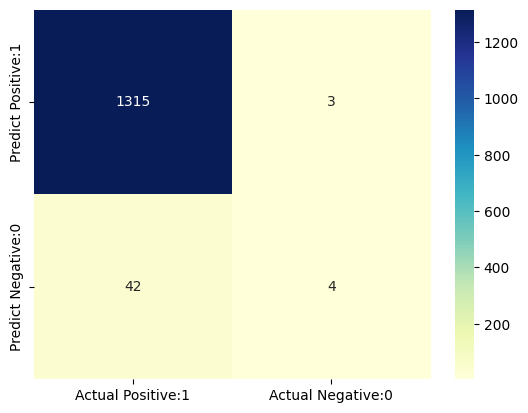

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Classification metrices

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

In [ ]:
#Classification accuracy

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
#Classification error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))



In [ ]:
"""
Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).
"""

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
"""
Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be defined as the ratio of TP to (TP + FN)"""

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
#True Positive Rate

#True Positive Rate is synonymous with Recall.

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:
#False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

In [ ]:
#Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
"""
f1-score¶

f1-score is the weighted harmonic mean of precision and recall.
The best possible f1-score would be 1.0 and the worst would be 0.0.
f1-score is the harmonic mean of precision and recall.
So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
The weighted average of f1-score should be used to compare classifier models, not global accuracy.
"""

In [ ]:
#ROC - AUC

In [ ]:
"""
ROC Curve

Another tool to measure the classification model performance visually is ROC Curve.
ROC Curve stands for Receiver Operating Characteristic Curve.
An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point.
This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels.
So, an ROC Curve plots TPR vs FPR at different classification threshold levels.
If we lower the threshold levels, it may result in more items being classified as positve.
It will increase both True Positives (TP) and False Positives (FP).
"""

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Taiwanese Banks Bankruptcy')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
"""
ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve.
It is a technique to compare classifier performance.
In this technique, we measure the area under the curve (AUC).
A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.
"""

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

#ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

#ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a bad job in classifying the banks' bankruptcy.



In [ ]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train_scaled, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8695


In [ ]:
#Handling Class Imbalance
#Bankrupt?
#0    0.967737
#1    0.032263
#From above we can see the banks with bankruptcy data are highly under represented in the dataset,
#To handle the class imbalance, you can use techniques like oversampling the minority class, undersampling the majority class,
#or using more advanced methods like SMOTE (Synthetic Minority Over-sampling Technique).

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the distribution of target variable before balancing
print(f'Original target distribution: {Counter(y_train)}')

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of target variable after balancing
print(f'Resampled target distribution: {Counter(y_train_smote)}')


Original target distribution: Counter({0: 5281, 1: 174})
Resampled target distribution: Counter({0: 5281, 1: 5281})


In [ ]:
#Performing PCA

#PCA is used for dimensionality reduction to transform the dataset into fewer dimensions while retaining most of the variance in the data.
#We have 96 features in total and we would like to cut it down to a reasonable number to process more intensive


In [ ]:
from sklearn.decomposition import PCA

# Standardize the dataset
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled2 = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=25)  # Adjust the number of components based on your requirement
X_train_pca = pca.fit_transform(X_train_smote_scaled)
X_test_pca = pca.transform(X_test_scaled2)

# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
cumulative_variance = np.cumsum(explained_variance)
print(f'Cumulative explained variance: {cumulative_variance}')


Explained variance by each component: [0.16438117 0.07672452 0.04874278 0.04255332 0.04093004 0.0335149
 0.02986066 0.02848711 0.02726217 0.02613162 0.01925496 0.01784027
 0.0168064  0.01652277 0.01557272 0.01503896 0.01444295 0.01306988
 0.01198961 0.01189781 0.01176479 0.0116308  0.01149037 0.01091741
 0.0108005 ]
Cumulative explained variance: [0.16438117 0.24110569 0.28984847 0.33240179 0.37333183 0.40684673
 0.43670739 0.4651945  0.49245666 0.51858828 0.53784324 0.55568351
 0.57248991 0.58901269 0.6045854  0.61962436 0.63406732 0.64713719
 0.65912681 0.67102462 0.6827894  0.69442021 0.70591058 0.71682799
 0.72762849]


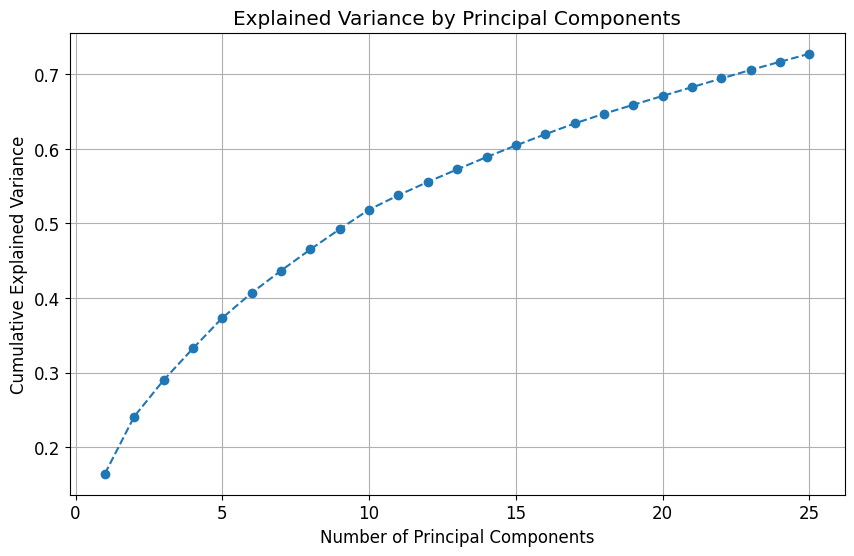

In [ ]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

Model accuracy score with PCA and balanced data: 0.9120


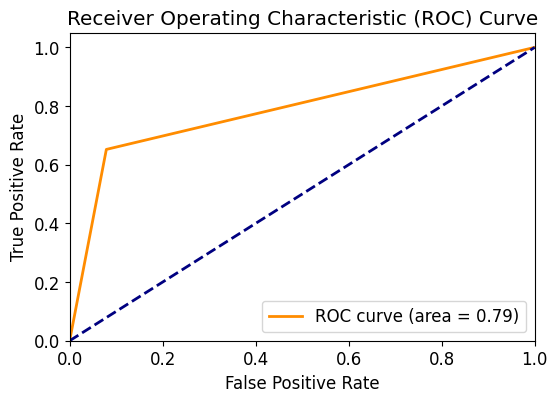

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc

# Instantiate the SVM classifier with default hyperparameters
svc = SVC()

# Fit the classifier to the PCA-transformed training set
svc.fit(X_train_pca, y_train_smote)

# Make predictions on the PCA-transformed test set
y_pred_pca = svc.predict(X_test_pca)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_pca)
print(f'Model accuracy score with PCA and balanced data: {accuracy:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pca)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: X has 2 features, but SVC is expecting 25 features as input.

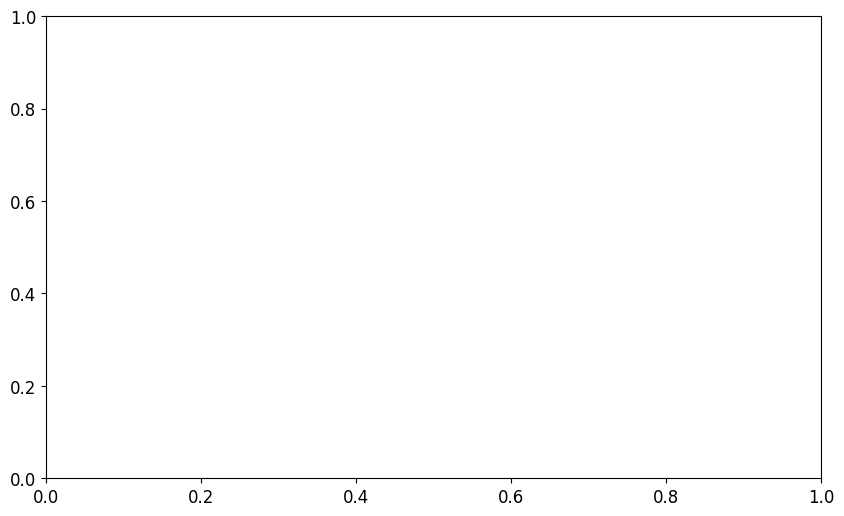

In [ ]:
# Plot decision boundary and support vectors (modified)
def plot_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Use only the first two PCA components for plotting
    X_2d = X[:, :2]

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))

    # Use the first two components for decision function
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

    # Plot the first two components of the data
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')

    # Plot support vectors (using first two components)
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5)

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.show()

# Plot the decision boundary (using first two components)
plot_svm_decision_boundary(svc, X_train_pca, y_train_smote)

In [ ]:
#Stratified k-fold Cross Validation with shuffle split

In [ ]:
"""
k-fold cross-validation is a very useful technique to evaluate model performance.
But, it fails here because we have a imbalanced dataset.
So, in the case of imbalanced dataset, I will use another technique to evaluate model performance.
It is called stratified k-fold cross-validation.

In stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

Moreover, I will shuffle the data before splitting because shuffling yields much better result
"""

'\nk-fold cross-validation is a very useful technique to evaluate model performance.\nBut, it fails here because we have a imbalanced dataset.\nSo, in the case of imbalanced dataset, I will use another technique to evaluate model performance.\nIt is called stratified k-fold cross-validation.\n\nIn stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.\n\nMoreover, I will shuffle the data before splitting because shuffling yields much better result\n'

In [ ]:
start_time = time.time()

from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X_train_pca, y_train_smote, cv=kfold)

end_time = time.time()
execution_time = end_time - start_time
print('Execution time: {0:.4f} seconds'.format(execution_time))


Execution time: 29.7756 seconds


In [ ]:
# Print the cross-validation scores and execution time
print('Cross-validation scores:', linear_scores)
print('Mean cross-validation score:', linear_scores.mean())

Cross-validation scores: [0.89256981 0.8902035  0.87736742 0.88352273 0.87594697]
Mean cross-validation score: 0.883922085860976


In [ ]:
#Stratified k-Fold Cross Validation with shuffle split with rbf kernel

In [ ]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X_train_pca, y_train_smote, cv=kfold)

In [ ]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))



Stratified Cross-validation scores with rbf kernel:

[0.93374349 0.92901088 0.92045455 0.91761364 0.91003788]


In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9222


In [ ]:
"""
Comments¶

I obtain higher average stratified k-fold cross-validation score of 0.9214 with linear kernel but the model accuracy is 0.9832.
So, stratified cross-validation technique does not help to improve the model performance.
"""

'\nComments¶\n\nI obtain higher average stratified k-fold cross-validation score of 0.9214 with linear kernel but the model accuracy is 0.9832. \nSo, stratified cross-validation technique does not help to improve the model performance.\n'

In [ ]:
#Hyperparameter Optimization using GridSearch CV

In [ ]:
start = time.time()

# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_pca, y_train_smote)


end = time.time()
execution_time = end - start
print('Execution time: {0:.4f} seconds'.format(execution_time))

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9813


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.2)


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_pca, y_test)))

GridSearch CV score on test set: 0.9560


In [ ]:
"""

Comments

    Our original model test accuracy is 0.9832 while GridSearch CV score on test-set is 0.9835.

    So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.

    Here, we should not confuse best_score_ attribute of grid_search with the score method on the test-set.

    The score method on the test-set gives the generalization performance of the model. Using the score method, we employ a model trained on the whole training set.

    The best_score_ attribute gives the mean cross-validation accuracy, with cross-validation performed on the training set.

"""

In [ ]:
#Results and conclusion

In [ ]:

"""
    There are outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

    We get maximum accuracy with rbf and linear kernel with C=100.0 and the accuracy is 0.9832.
    So, we can conclude that our model is doing a very good job in terms of predicting the class labels.
    But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.
    So, we must explore confusion matrix that provide better guidance in selecting models.

    ROC AUC of our model is very close to 1.
    So, we can conclude that our classifier does a good job in classifying the pulsar star.

    I obtain higher average stratified k-fold cross-validation score of 0.9789 with linear kernel but the model accuracy is 0.9832.
    So, stratified cross-validation technique does not help to improve the model performance.

    Our original model test accuracy is 0.9832 while GridSearch CV score on test-set is 0.9835.
    So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.
"""